22H1120016 - Trần Đăng Nam

Thực hiện trên dữ liệu các loại rượu - wine dataset
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine


In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, make_scorer
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [2]:
# Load the Wine dataset
wine = load_wine()
# X = wine.data
# y = wine.target


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, 
                                                   test_size=0.3, 
                                                   train_size=0.7,
                                                   random_state=43, 
                                                   stratify =  wine.target)

# Standardize the features -> for boxplot ploting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Define parameter grid for grid search
param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create F1 scorer for multiclass classification
f1_scorer = make_scorer(f1_score, average='macro')

# Create the grid search with cross-validation
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=15,              # 15-fold cross-validation for training 
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score (CV): {best_score:.4f}")


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1 Score (CV): 0.9597


In [25]:
# Train the final model with the best parameters
best_dt = DecisionTreeClassifier(random_state=100, **best_params)
best_dt.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_pred = best_dt.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred, average='macro')
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest F1 Score: {test_f1:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test F1 Score: 0.9456
Test Accuracy: 0.9444



Classification Report:
              precision    recall  f1-score   support

     class_0       0.89      0.94      0.92        18
     class_1       0.95      0.95      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.95        54
weighted avg       0.95      0.94      0.94        54


Confusion Matrix:
[[17  1  0]
 [ 1 20  0]
 [ 1  0 14]]


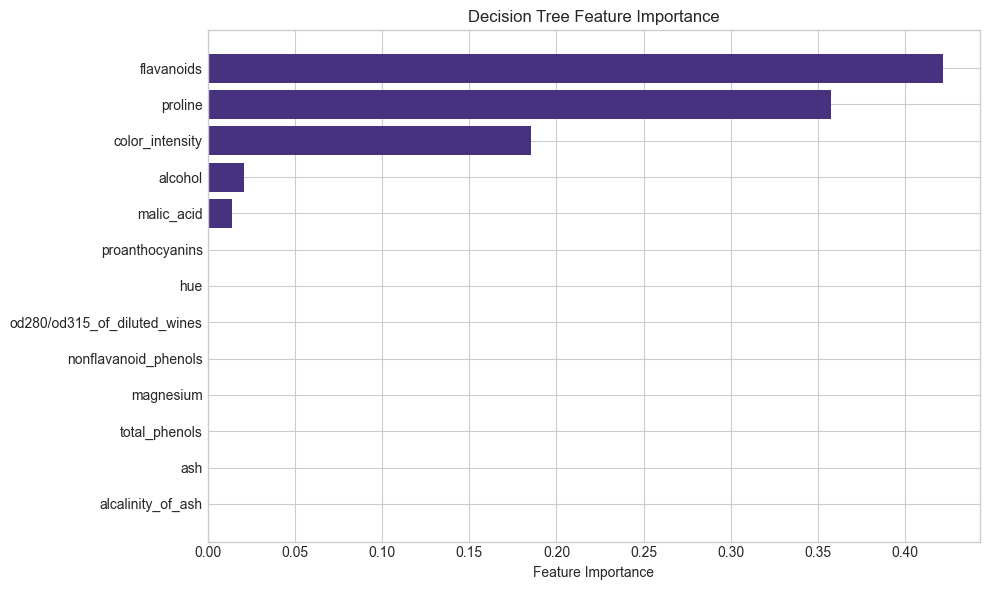

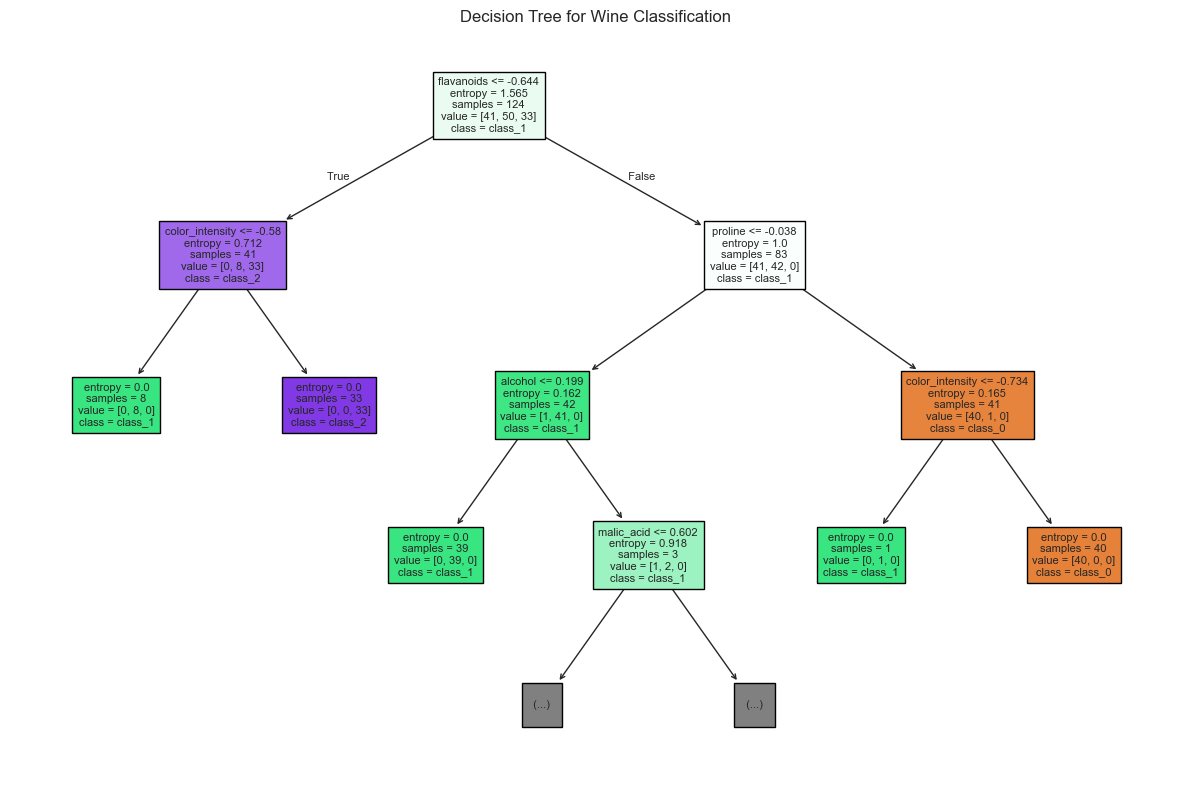


Wine Dataset Information:
Number of samples: 178
Number of features: 13
Number of classes: 3
Class distribution: [59 71 48]

Feature names:
1. alcohol
2. malic_acid
3. ash
4. alcalinity_of_ash
5. magnesium
6. total_phenols
7. flavanoids
8. nonflavanoid_phenols
9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline


In [30]:

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance = best_dt.feature_importances_

sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [wine.feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

# Visualize the decision tree (with compact parameters)
plt.figure(figsize=(12, 8))
plot_tree(
    best_dt, 
    filled=True, 
    feature_names=wine.feature_names, 
    class_names=wine.target_names,
    fontsize=8,
    max_depth=3,
    proportion=False
)
plt.title('Decision Tree for Wine Classification')
plt.tight_layout()
plt.show()





# Print information about the dataset
print("\nWine Dataset Information:")
print(f"Number of samples: {len(wine.data)}")
print(f"Number of features: {len(wine.feature_names)}")
print(f"Number of classes: {len(wine.target_names)}")
print(f"Class distribution: {np.bincount(wine.target)}")
print("\nFeature names:")
for i, feature in enumerate(wine.feature_names):
    print(f"{i+1}. {feature}")